In [22]:
USE_PCA = True

In [23]:
# Loading the data
import pandas as pd
import numpy as np
team_season = pd.read_csv('data/team_season.txt')
player_season = pd.read_csv('data/player_regular_season.txt')
coaches_season = pd.read_csv('data/coaches_season.txt')
player_allstar = pd.read_csv('data/player_allstar.txt')
player_biological = pd.read_csv('data/players.txt')

print('Data loaded!')
print('team_season shape:', team_season.shape)
print('player_season shape:', player_season.shape)
print('coaches_season shape:', coaches_season.shape)
print('player_allstar shape:', player_allstar.shape)
print('player_biological shape:', player_biological.shape)

Data loaded!
team_season shape: (1187, 36)
player_season shape: (19112, 23)
coaches_season shape: (1241, 10)
player_allstar shape: (1462, 23)
player_biological shape: (3572, 11)


In [24]:
# We want to convert our height to a single unit, inches
player_biological["height"] = player_biological["h_feet"]*12 + player_biological["h_inches"]

# only keep ilkid, height, weight
player_biological = player_biological[[
    "ilkid", 
    "height", 
    "weight"
]]

player_biological.head()

,ilkid,height,weight
0,ABDELAL01,82.0,240.0
1,ABDULKA01,86.0,225.0
2,ABDULMA01,73.0,162.0
3,ABDULTA01,78.0,223.0
4,ABDURSH01,81.0,225.0


In [25]:
# fga and fgm are field goals attempted and made, we can simply calculate the field goal percentage
player_season["fg%"] = np.where(player_season["fga"] == 0, 0, player_season["fgm"]/player_season["fga"])
# fta and ftm are free throws attempted and made, we can simply calculate the free throw percentage
player_season["ft%"] = np.where(player_season["fta"] == 0, 0, player_season["ftm"]/player_season["fta"])
# tpa and tpm are three points attempted and made, we can simply calculate the three point percentage
player_season["3p%"] = np.where(player_season["tpa"] == 0, 0, player_season["tpm"]/player_season["tpa"])


## We could optionally calculate them on an average per game basis
player_season["pts_pg"] = player_season["pts"]/player_season["gp"]
player_season["oreb_pg"] = player_season["oreb"]/player_season["gp"]
player_season["dreb_pg"] = player_season["dreb"]/player_season["gp"]
player_season["reb_pg"] = player_season["reb"]/player_season["gp"]
player_season["asts_pg"] = player_season["asts"]/player_season["gp"]
player_season["stl_pg"] = player_season["stl"]/player_season["gp"]
player_season["blk_pg"] = player_season["blk"]/player_season["gp"]
player_season["turnover_pg"] = player_season["turnover"]/player_season["gp"]
player_season["pf_pg"] = player_season["pf"]/player_season["gp"]

player_season = player_season[[ 
    'ilkid', 'team', 'year', # basic info    
    'fg%', 'ft%', '3p%', # shooting
    # all the stats
    'gp', 'minutes', 'pts', 'oreb', 'dreb', 'reb', 'asts', 
    'stl', 'blk', 'turnover', 'pf', 
    # or per game stats
    # 'pts_pg', 'oreb_pg', 'dreb_pg', 'reb_pg', 'asts_pg', 'stl_pg', 'blk_pg', 'turnover_pg', 'pf_pg' # per game
]]

# merge with player bio data
player_season = player_season.merge(player_biological, on='ilkid', how='left')

player_season.head()

,ilkid,team,year,fg%,ft%,3p%,gp,minutes,pts,oreb,dreb,reb,asts,stl,blk,turnover,pf,height,weight
0,ABRAMJO01,PIT,1946,0.242206,0.691011,0.0,47,0,527,0,0,0,35,0,0,0.0,161,75.0,195.0
1,AUBUCCH01,DE1,1946,0.252747,0.542857,0.0,30,0,65,0,0,0,20,0,0,0.0,46,70.0,137.0
2,BAKERNO01,CH1,1946,0.000000,0.000000,0.0,4,0,0,0,0,0,0,0,0,0.0,0,72.0,180.0
3,BALTIHE01,ST1,1946,0.201521,0.463768,0.0,58,0,138,0,0,0,16,0,0,0.0,98,76.0,195.0
4,BARRJO01,ST1,1946,0.283105,0.594937,0.0,58,0,295,0,0,0,54,0,0,0.0,164,75.0,205.0


In [26]:
# identify all star players and add a column to player_season with a boolean value
player_allstar["allstar"] = 1
player_allstar = player_allstar[["ilkid", "year", "allstar"]]
# it is not upper case in player_allstar
player_allstar["ilkid"] = player_allstar["ilkid"].astype(str).str.upper()
# strip whitespace from ilkid
player_allstar["ilkid"] = player_allstar["ilkid"].str.strip()
player_season["ilkid"] = player_season["ilkid"].astype(str).str.upper()

player_season_allstar = pd.merge(
    player_season, player_allstar,
    on=['ilkid', 'year'],
    how='left'
)
player_season_allstar["allstar"] = player_season_allstar["allstar"].fillna(0)
# print all star players
player_season_allstar[player_season_allstar["ilkid"] == "ABDULKA01"]

,ilkid,team,year,fg%,ft%,3p%,gp,minutes,pts,oreb,dreb,reb,asts,stl,blk,turnover,pf,height,weight,allstar
3492,ABDULKA01,MIL,1969,0.518232,0.652759,0.000000,82,3534,2361,0,0,1190,337,0,0,0.0,283,86.0,225.0,1.0
3846,ABDULKA01,MIL,1970,0.576777,0.690162,0.000000,82,3288,2596,0,0,1311,272,0,0,0.0,264,86.0,225.0,1.0
4228,ABDULKA01,MIL,1971,0.574047,0.688525,0.000000,81,3583,2822,0,0,1346,370,0,0,0.0,235,86.0,225.0,1.0
4637,ABDULKA01,MIL,1972,0.554176,0.713043,0.000000,76,3254,2292,0,0,1224,379,0,0,0.0,208,86.0,225.0,1.0
5039,ABDULKA01,MIL,1973,0.538943,0.702381,0.000000,81,3548,2191,287,891,1178,386,112,283,0.0,238,86.0,225.0,1.0
5407,ABDULKA01,MIL,1974,0.512626,0.762911,0.000000,65,2747,1949,194,718,912,264,65,212,0.0,205,86.0,225.0,1.0
5807,ABDULKA01,LAL,1975,0.528935,0.702830,0.000000,82,3379,2275,272,1111,1383,413,119,338,0.0,292,86.0,225.0,1.0
6191,ABDULKA01,LAL,1976,0.579256,0.701493,0.000000,82,3016,2152,266,824,1090,319,101,261,0.0,262,86.0,225.0,1.0
6548,ABDULKA01,LAL,1977,0.550207,0.782857,0.000000,62,2265,1600,186,615,801,269,103,185,208.0,182,86.0,225.0,0.0
6922,ABDULKA01,LAL,1978,0.576837,0.736287,0.000000,80,3157,1903,207,818,1025,431,76,316,282.0,230,86.0,225.0,1.0


In [27]:
# team_season data
# we can also simplify some data here
# how many points they scored per game 
# divided by the number of times they had the ball
team_season["offensive_rating"] = np.where(
    team_season['pace'] > 0,
    team_season['o_pts'] / team_season['pace'] * 100,
    0
)
# how many points they allowed per game
# divided by the number of times the other team had the ball
team_season["defensive_rating"] = np.where(
    team_season['pace'] > 0,
    team_season['d_pts'] / team_season['pace'] * 100,
    0
)
# and the difference between the two
team_season["net_rating"] = team_season["offensive_rating"] - team_season["defensive_rating"]
# then some of the same percentages as the player data
team_season["fg%"] = np.where(team_season["o_fga"] == 0, 0, team_season["o_fgm"]/team_season["o_fga"])
team_season["ft%"] = np.where(team_season["o_fta"] == 0, 0, team_season["o_ftm"]/team_season["o_fta"])
team_season["3p%"] = np.where(team_season["o_3pa"] == 0, 0, team_season["o_3pm"]/team_season["o_3pa"])
total_games = team_season['won'] + team_season['lost']
team_season["win%"] = np.where(total_games == 0, 0, team_season['won']/total_games)

team_season = team_season[[
    'team', 'year', # basic info
    'offensive_rating', 'defensive_rating', 'net_rating', # ratings
    'fg%', 'ft%', '3p%', 'win%', # shooting and winning
    'pace', 'won', 'lost' # pace and wins
]]

team_season.head()

,team,year,offensive_rating,defensive_rating,net_rating,fg%,ft%,3p%,win%,pace,won,lost
0,BOS,1946,0.0,0.0,0.0,0.272161,0.589818,0.0,0.366667,0.0,22,38
1,CH1,1946,0.0,0.0,0.0,0.297828,0.605806,0.0,0.639344,0.0,39,22
2,CL1,1946,0.0,0.0,0.0,0.293736,0.632353,0.0,0.500000,0.0,30,30
3,DE1,1946,0.0,0.0,0.0,0.245935,0.617805,0.0,0.333333,0.0,20,40
4,NYK,1946,0.0,0.0,0.0,0.278782,0.661335,0.0,0.550000,0.0,33,27


# Method 1
We aggregate player statistics into the team level and then use the team statistics to predict the outcome of the match.

In [28]:
# Way 1 - Aggregating player stats to team stats
team_season_player_stats = player_season_allstar.groupby(['team', 'year']).agg({
    'fg%': 'mean', 'ft%': 'mean', '3p%': 'mean', # shooting
    'gp': 'sum', 'minutes': 'sum', 'pts': 'sum', 'oreb': 'sum', 'dreb': 'sum', 'reb': 'sum', 
    'asts': 'sum', 'stl': 'sum', 'blk': 'sum', 'turnover': 'sum', 'pf': 'sum', # all the stats
    'height': 'mean', 'weight': 'mean', # bio
    'allstar': 'sum' # allstar appearances
}).reset_index()

# then merging with team_season data
team_season_allstar = team_season.merge(
    team_season_player_stats,
    on=['team', 'year'],
    how='left'
)

team_season_allstar.head()

,team,year,offensive_rating,defensive_rating,net_rating,fg%_x,ft%_x,3p%_x,win%,pace,...,dreb,reb,asts,stl,blk,turnover,pf,height,weight,allstar
0,BOS,1946,0.0,0.0,0.0,0.272161,0.589818,0.0,0.366667,0.0,...,0,0,470,0,0,0.0,1202,73.950000,188.800000,0.0
1,CH1,1946,0.0,0.0,0.0,0.297828,0.605806,0.0,0.639344,0.0,...,0,0,436,0,0,0.0,1473,73.906250,187.187500,0.0
2,CL1,1946,0.0,0.0,0.0,0.293736,0.632353,0.0,0.500000,0.0,...,0,0,494,0,0,0.0,1246,74.666667,194.117647,0.0
3,DE1,1946,0.0,0.0,0.0,0.245935,0.617805,0.0,0.333333,0.0,...,0,0,482,0,0,0.0,1351,74.600000,188.133333,0.0
4,NYK,1946,0.0,0.0,0.0,0.278782,0.661335,0.0,0.550000,0.0,...,0,0,457,0,0,0.0,1218,74.500000,187.250000,0.0


# Data Normalization

In [31]:
from sklearn.preprocessing import StandardScaler

normalized_dataframe = None

features = ['offensive_rating', 'defensive_rating', 'net_rating',
       'fg%_x', 'ft%_x', '3p%_x', 'pace', 'fg%_y',
       'ft%_y', '3p%_y', 
       'gp', 'minutes', 'pts', 'oreb', 'dreb', 'reb', 'asts','stl', 'blk', 
       'turnover', 'pf', 'height', 'weight', 'allstar']

scaler = StandardScaler()
normalized_dataframe = team_season_allstar.copy()
normalized_dataframe[features] = scaler.fit_transform(team_season_allstar[features])
normalized_dataframe.head()

,team,year,offensive_rating,defensive_rating,net_rating,fg%_x,ft%_x,3p%_x,win%,pace,...,dreb,reb,asts,stl,blk,turnover,pf,height,weight,allstar
0,BOS,1946,-1.429173,-1.429605,-0.002095,-4.143252,-4.887207,-0.414935,0.366667,-1.436687,...,-1.465293,-3.873519,-3.738697,-1.47453,-1.429696,-1.379502,-2.727812,-3.627060,-2.254780,-1.116108
1,CH1,1946,-1.429173,-1.429605,-0.002095,-3.543018,-4.386355,-0.414935,0.639344,-1.436687,...,-1.465293,-3.873519,-3.831598,-1.47453,-1.429696,-1.379502,-1.686648,-3.664690,-2.451368,-1.116108
2,CL1,1946,-1.429173,-1.429605,-0.002095,-3.638725,-3.554753,-0.414935,0.500000,-1.436687,...,-1.465293,-3.873519,-3.673120,-1.47453,-1.429696,-1.379502,-2.558766,-3.010656,-1.606477,-1.116108
3,DE1,1946,-1.429173,-1.429605,-0.002095,-4.756517,-4.010499,-0.414935,0.333333,-1.436687,...,-1.465293,-3.873519,-3.705909,-1.47453,-1.429696,-1.379502,-2.155363,-3.067996,-2.336057,-1.116108
4,NYK,1946,-1.429173,-1.429605,-0.002095,-3.988409,-2.646847,-0.414935,0.550000,-1.436687,...,-1.465293,-3.873519,-3.774218,-1.47453,-1.429696,-1.379502,-2.666341,-3.154006,-2.443749,-1.116108


In [32]:
matchups = []
features = ['offensive_rating', 'defensive_rating', 'net_rating',
       'fg%_x', 'ft%_x', '3p%_x', 'pace', 'fg%_y',
       'ft%_y', '3p%_y', 
       'gp', 'minutes', 'pts', 'oreb', 'dreb', 'reb', 'asts','stl', 'blk', 
       'turnover', 'pf', 'height', 'weight', 'allstar']

for year in normalized_dataframe['year'].unique():
    year_data = normalized_dataframe[normalized_dataframe['year'] == year]
    teams = year_data['team'].unique()
    for i in range(len(teams)):
        # so we dont compare the same teams against each other
        for j in range(len(teams)):
            if teams[i] == teams[j]:
                continue
            
            team1_data = year_data[year_data['team'] == teams[i]].iloc[0]
            team2_data = year_data[year_data['team'] == teams[j]].iloc[0]
            match_features = {}
            for feat in features:
                match_features[feat] = team1_data[feat] - team2_data[feat]
            # we use a simple heuristic to determine the winner
            match_features['winner'] = 1 if team1_data['win%'] > team2_data['win%'] else 0
            matchups.append(match_features)
            
matchups_df = pd.DataFrame(matchups)
matchups_df.head()

,offensive_rating,defensive_rating,net_rating,fg%_x,ft%_x,3p%_x,pace,fg%_y,ft%_y,3p%_y,...,reb,asts,stl,blk,turnover,pf,height,weight,allstar,winner
0,0.0,0.0,0.0,-0.600234,-0.500853,0.0,0.0,0.136159,2.512622,0.0,...,0.0,0.092901,0.0,0.0,0.0,-1.041164,0.037629,0.196588,0.0,0
1,0.0,0.0,0.0,-0.504527,-1.332455,0.0,0.0,0.520527,1.102218,0.0,...,0.0,-0.065577,0.0,0.0,0.0,-0.169045,-0.616404,-0.648302,0.0,0
2,0.0,0.0,0.0,0.613265,-0.876708,0.0,0.0,0.381502,-0.064922,0.0,...,0.0,-0.032789,0.0,0.0,0.0,-0.572448,-0.559064,0.081277,0.0,1
3,0.0,0.0,0.0,-0.154843,-2.240360,0.0,0.0,-0.512193,-1.888359,0.0,...,0.0,0.035521,0.0,0.0,0.0,-0.061471,-0.473054,0.188969,0.0,0
4,0.0,0.0,0.0,-0.194094,-3.074727,0.0,0.0,-0.420539,-1.621546,0.0,...,0.0,0.382533,0.0,0.0,0.0,0.710758,0.113377,0.973106,0.0,0


# Dimensionality Reduction

In [33]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [34]:
def pca_analysis(X, feature_names):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Calculate variance ratios
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Create component loadings DataFrame
    loadings = pca.components_.T
    loading_df = pd.DataFrame(
        loadings,
        columns=[f'PC{i+1}' for i in range(loadings.shape[1])],
        index=feature_names
    )

    return pca, X_pca, explained_variance_ratio, cumulative_variance_ratio, loading_df

In [35]:
X_binary = matchups_df.drop('winner', axis=1)
X_regression = normalized_dataframe[features]

X_binary_pca = pca_analysis(X_binary, features)
X_regression_pca = pca_analysis(X_regression, features)


In [36]:
print("\nBinary Classification PCA Summary:")
print("---------------------------------")
print("Explained Variance Ratios:")
for i, var in enumerate(X_binary_pca[2][:5]):
    print(f"PC{i+1}: {var:.3f} ({X_binary_pca[3][i]:.3f} cumulative)")
n_components_90_binary = np.argmax(X_binary_pca[3] >= 0.9) + 1
print(f"\nComponents needed for 90% variance: {n_components_90_binary}")

print("\nRegression PCA Summary:")
print("----------------------")
print("Explained Variance Ratios:")
for i, var in enumerate(X_regression_pca[2][:5]):
    print(f"PC{i+1}: {var:.3f} ({X_regression_pca[3][i]:.3f} cumulative)")
n_components_90_regression = np.argmax(X_regression_pca[3] >= 0.9) + 1
print(f"\nComponents needed for 90% variance: {n_components_90_regression}")



Binary Classification PCA Summary:
---------------------------------
Explained Variance Ratios:
PC1: 0.215 (0.215 cumulative)
PC2: 0.195 (0.410 cumulative)
PC3: 0.105 (0.515 cumulative)
PC4: 0.068 (0.583 cumulative)
PC5: 0.057 (0.640 cumulative)

Components needed for 90% variance: 13

Regression PCA Summary:
----------------------
Explained Variance Ratios:
PC1: 0.456 (0.456 cumulative)
PC2: 0.187 (0.643 cumulative)
PC3: 0.066 (0.709 cumulative)
PC4: 0.058 (0.768 cumulative)
PC5: 0.046 (0.813 cumulative)

Components needed for 90% variance: 9


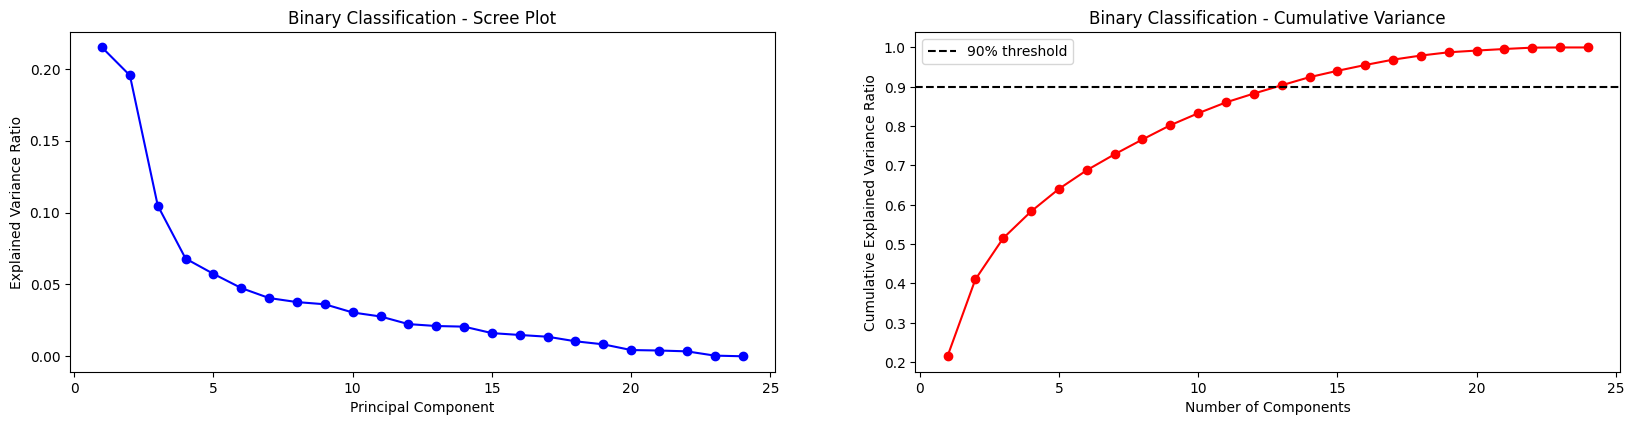

In [37]:
%matplotlib inline
fig = plt.figure(figsize=(20, 15))

plt.subplot(321)
plt.plot(range(1, len(X_binary_pca[2]) + 1), X_binary_pca[2], 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Binary Classification - Scree Plot')

# Cumulative variance
plt.subplot(322)
plt.plot(range(1, len(X_binary_pca[3]) + 1), X_binary_pca[3], 'ro-')
plt.axhline(y=0.9, color='k', linestyle='--', label='90% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Binary Classification - Cumulative Variance')
plt.legend()


plt.show()


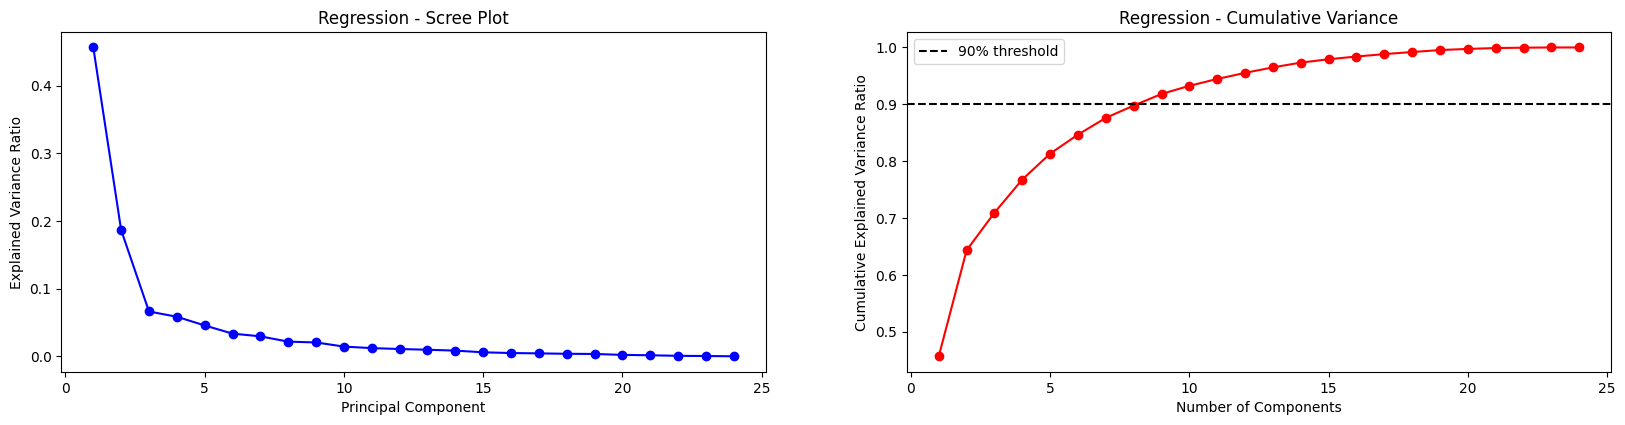

In [38]:
%matplotlib inline
fig = plt.figure(figsize=(20, 15))

# Scree plot
plt.subplot(323)
plt.plot(range(1, len(X_regression_pca[2]) + 1), X_regression_pca[2], 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Regression - Scree Plot')

# Cumulative variance
plt.subplot(324)
plt.plot(range(1, len(X_regression_pca[3]) + 1), X_regression_pca[3], 'ro-')
plt.axhline(y=0.9, color='k', linestyle='--', label='90% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Regression - Cumulative Variance')
plt.legend()

plt.show()


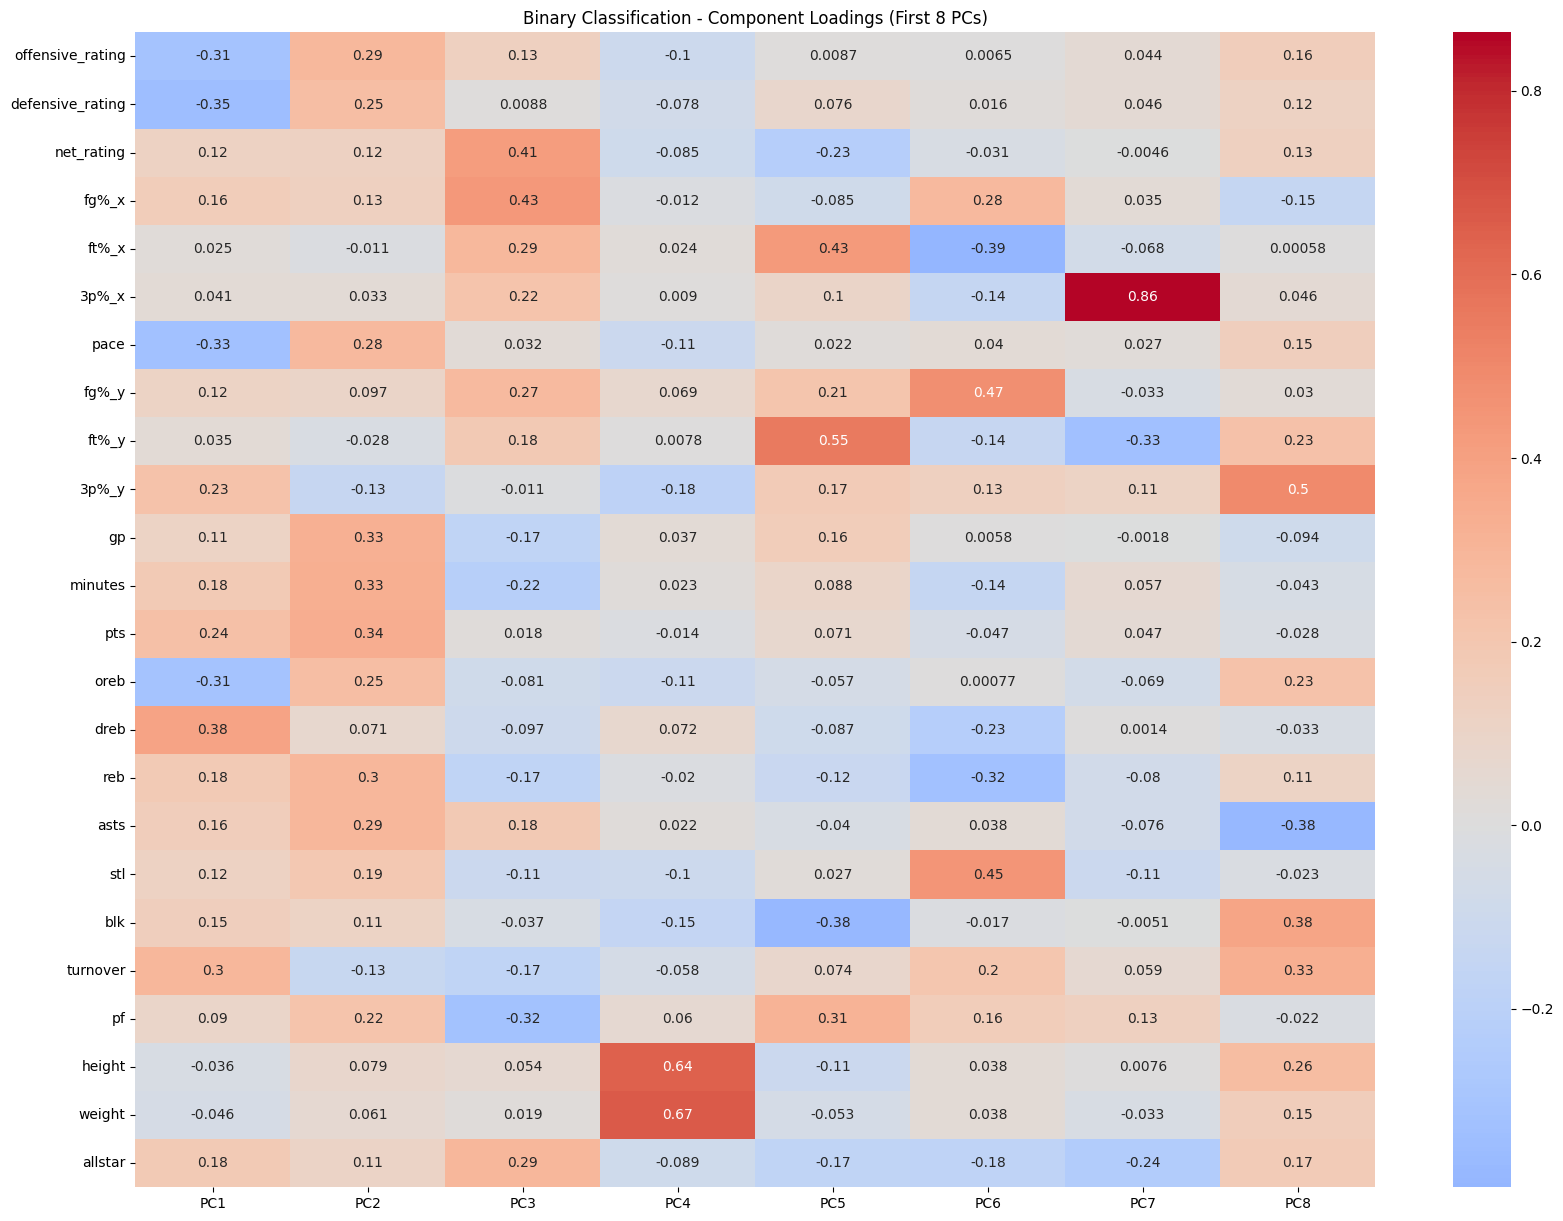

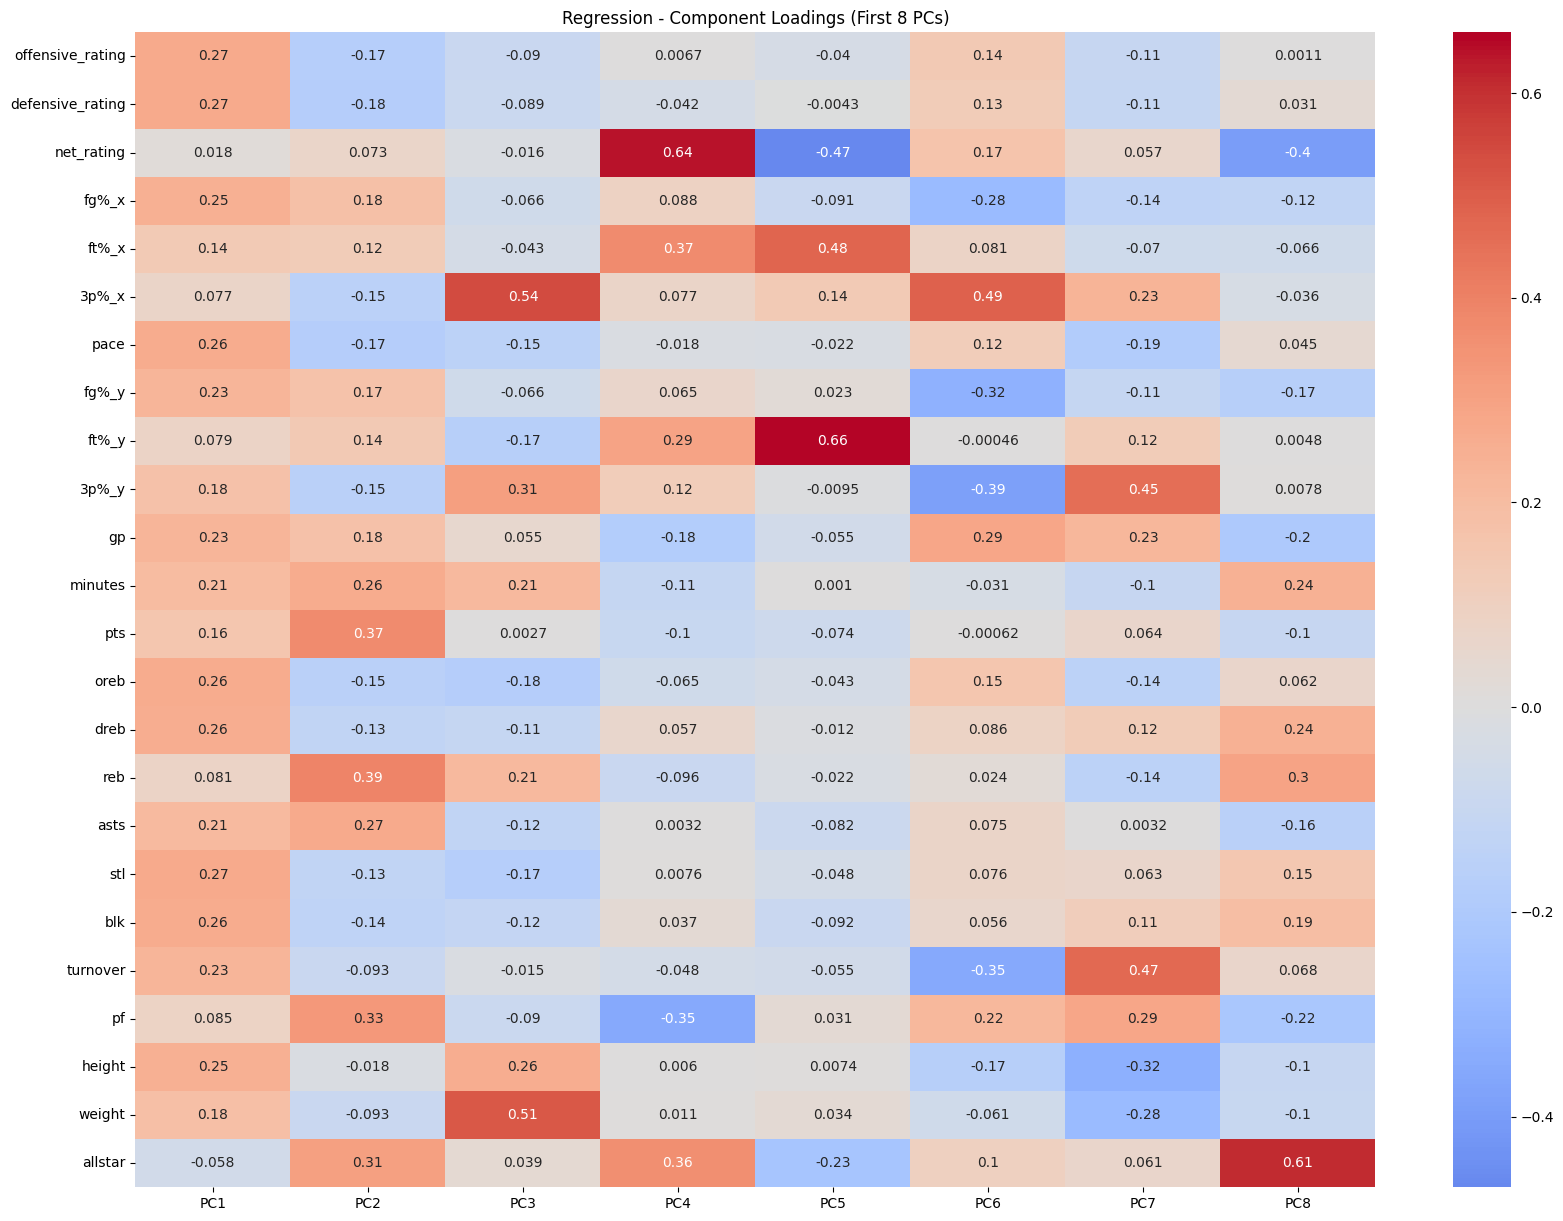

In [39]:
%matplotlib inline
fig = plt.figure(figsize=(20, 15))

# Component loadings heatmaps
sns.heatmap(X_binary_pca[4].iloc[:, :8], annot=True, cmap='coolwarm', center=0)
plt.title('Binary Classification - Component Loadings (First 8 PCs)')
plt.show()

fig = plt.figure(figsize=(20, 15))
sns.heatmap(X_regression_pca[4].iloc[:, :8], annot=True, cmap='coolwarm', center=0)
plt.title('Regression - Component Loadings (First 8 PCs)')
plt.show()



In [40]:
from sklearn.model_selection import train_test_split

X_pca = X_binary_pca[1][:, :n_components_90_binary]
X_raw = X_binary[features]
y = matchups_df['winner']

print(X_pca.shape)
print(X_raw.shape)
print(y.shape)

(26740, 13)
(26740, 24)
(26740,)


In [41]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print("\nBinary Classification K-Fold Results:")
    print("-" * 40)
    print(f"Fold Scores: {cv_scores}")
    print(f"Average Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
print("\nRandom Forest Classifier: PCA Features")
evaluate_model(rf_classifier, X_pca, y)
print("\nRandom Forest Classifier: Raw Features")
evaluate_model(rf_classifier, X_raw, y)



Random Forest Classifier: PCA Features

Binary Classification K-Fold Results:
----------------------------------------
Fold Scores: [0.73373224 0.80086013 0.87284966 0.88986537 0.86593119]
Average Accuracy: 0.8326 (+/- 0.1159)

Random Forest Classifier: Raw Features

Binary Classification K-Fold Results:
----------------------------------------
Fold Scores: [0.74401645 0.86967091 0.93081526 0.93193717 0.93717277]
Average Accuracy: 0.8827 (+/- 0.1473)


In [42]:
# XGBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier

xgb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
print("\nXGBoost Classifier: PCA Features")
evaluate_model(xgb_classifier, X_pca, y)
print("\nXGBoost Classifier: Raw Features")
evaluate_model(xgb_classifier, X_raw, y)


XGBoost Classifier: PCA Features

Binary Classification K-Fold Results:
----------------------------------------
Fold Scores: [0.71877337 0.80160808 0.87715034 0.89435303 0.87378459]
Average Accuracy: 0.8331 (+/- 0.1309)

XGBoost Classifier: Raw Features

Binary Classification K-Fold Results:
----------------------------------------
Fold Scores: [0.73915482 0.87060583 0.93044129 0.93137622 0.93492895]
Average Accuracy: 0.8813 (+/- 0.1500)


In [43]:

X_pca = X_regression_pca[1][:, :n_components_90_regression]
X_raw = X_regression[features]
y = normalized_dataframe['win%']

print(X_pca.shape)
print(X_raw.shape)
print(y.shape)

(1187, 9)
(1187, 24)
(1187,)


In [44]:
def evaluate_model_regression(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    print("\nRegression K-Fold Results:")
    print("-" * 40)
    print(f"Fold Scores: {cv_scores}")
    print(f"Average R^2: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
print("\nRandom Forest Regressor: PCA Features")
evaluate_model_regression(rf_regressor, X_pca, y)
print("\nRandom Forest Regressor: Raw Features")
evaluate_model_regression(rf_regressor, X_raw, y)


Random Forest Regressor: PCA Features

Regression K-Fold Results:
----------------------------------------
Fold Scores: [0.1210415  0.34663865 0.89023915 0.91237468 0.83738432]
Average R^2: 0.6215 (+/- 0.6508)

Random Forest Regressor: Raw Features

Regression K-Fold Results:
----------------------------------------
Fold Scores: [-0.38881871  0.34238678  0.9018281   0.93023883  0.90027967]
Average R^2: 0.5372 (+/- 1.0256)


In [45]:
# XGBoost Regressor
from sklearn.ensemble import GradientBoostingRegressor

xgb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
print("\nXGBoost Regressor: PCA Features")
evaluate_model_regression(xgb_regressor, X_pca, y)
print("\nXGBoost Regressor: Raw Features")
evaluate_model_regression(xgb_regressor, X_raw, y)


XGBoost Regressor: PCA Features

Regression K-Fold Results:
----------------------------------------
Fold Scores: [0.15628229 0.3934275  0.8783009  0.91245549 0.75024787]
Average R^2: 0.6181 (+/- 0.5903)

XGBoost Regressor: Raw Features

Regression K-Fold Results:
----------------------------------------
Fold Scores: [-0.23617469  0.33618029  0.90680179  0.92316003  0.81326974]
Average R^2: 0.5486 (+/- 0.8943)
